In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# package for gmm
from sklearn.mixture import GaussianMixture as GMM

%matplotlib inline
import matplotlib.pyplot as plt

# サンプルデータの作成

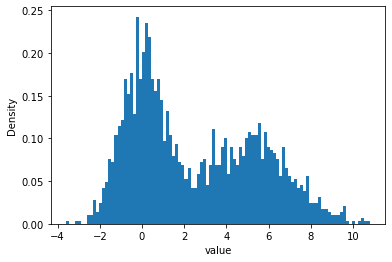

In [13]:
# ガウス分布からサンプルデータを作成
x1 = np.random.normal(0, 1, 1000)  # 平均0，標準偏差1
x2 = np.random.normal(5, 2, 1000)  # 平均5，標準偏差2
x = np.concatenate((x1, x2))  # 混合分布の作成

# 混合分布の描画
plt.hist(x, density=True, bins=100);
plt.ylabel("Density");
plt.xlabel("value");

# GMM によるパラメータ推定

In [4]:
# インスタンスを生成
gmm = GMM(n_components=2,  # 想定する分布数
          max_iter=1000, # 繰り返し数
          covariance_type= "spherical", # 共分散タイプ
          random_state=1234)

# 学習
gmm.fit(x.reshape(-1, 1)) # sklearnの入力形状合わせて入力・学習

GaussianMixture(covariance_type='spherical', init_params='kmeans',
                max_iter=1000, means_init=None, n_components=2, n_init=1,
                precisions_init=None, random_state=1234, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

## 推定パラメータ

### weight

In [6]:
weight = gmm.weights_ # 重み
print(weight)

[0.49532079 0.50467921]


### mean

In [7]:
mean = gmm.means_ # 平均
print(mean)

[[5.04083568]
 [0.02944873]]


### covariances

In [8]:
cov = gmm.covariances_ # 共分散
print(cov)

[4.06478669 0.94194101]


## 推定済みパラメータに基づく確率密度分布の導出

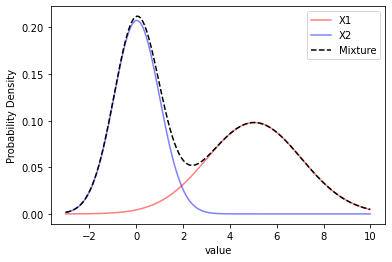

In [26]:
_range = np.arange(-3, 10, 0.01)
X1 = weight[0] * norm.pdf(_range, mean[0], np.sqrt(cov[0]))
X2 = weight[1] * norm.pdf(_range,mean[1], np.sqrt(cov[1]))

plt.plot(_range, X1.flatten(), label="X1", color='red', alpha=0.5);
plt.plot(_range, X2.flatten(), label="X2", color='blue', alpha=0.5);
plt.plot(_range, (X1 + X2).flatten(), label="Mixture", color='black', alpha=1, linestyle="--")
plt.ylabel("Probability Density");
plt.xlabel("value");
plt.legend();

## 推定結果に基づくクラスタリング

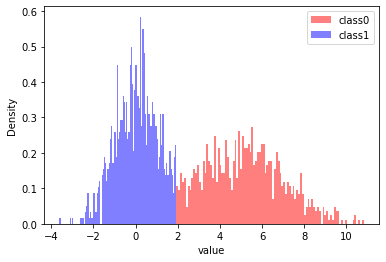

In [27]:
# クラスタリング結果を取得
predict = gmm.predict(x.reshape(-1, 1))

# クラスタリング結果ごとにヒストグラムを描画
plt.hist(x[predict == 0], density=True, bins=100, color='red', alpha=0.5,label="class0");
plt.hist(x[predict == 1], density=True, bins=100, color='blue', alpha=0.5,label="class1");
plt.ylabel("Density");
plt.xlabel("value");
plt.legend();
plt.show();